In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn import linear_model
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16
from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rc('axes', **{'titlesize': '16', 'labelsize': '16'})
rc('legend', **{'fontsize': '16'})
rc('figure', **{'dpi' : 150})

$1.$ Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, 
если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. 
В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Пусть события $I$ - подсудимый невиновен, $I'$ - подсудимый виновен. $E$ - группа крови подсудимого и группа крови на месте преступления совпадают. 
Прокурор хотел посчитать $P(I'|E) = 1 - P(I|E)$. Но вместо $P(I|E)$ взял $P(E)=0.01$. По формуле Байеса $$P(I | E) =\frac{ P(E | I)\cdot P(I)}{P(E)}$$
Распишем по формуле полной вероятности $P(E) = P(E|I)P(I)+P(E|I')P(I')$. Т.к кровь найдена на месте преступления, то $P(E|I')=1$. Выразим $P(E|I) = \frac{P(E)-P(I')}{P(I)}$ и подставим в формулу Байеса. Получим $P(I|E) = 1 - \frac{P(I')}{P(E)} = 1- 100\cdot P(I')$, $P(I'|E) = \frac{P(I')}{P(E)} = 100\cdot P(I')$

$2.$ Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, 
    что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый 
    совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством,
    а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его 
    из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Адвокат посчитал вероятность того, что любой человек с такой группой крови совершил убийство,но не учел того, что подозреваемый уже находится под следствием, значит должны быть еще какие-то улики. Адвокат должен был оценить вероятность того, что подсудимый невиновен при условии, что его кровь принадлежит редкой группе $P(I|E)$. В п.1 было показано, что $P(I|E) = 1 - \frac{P(I')}{P(E)} = 1- 100\cdot P(I')$

$3.$ Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, 
а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет 
апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. 
Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives 
(когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт 
отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста 
от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


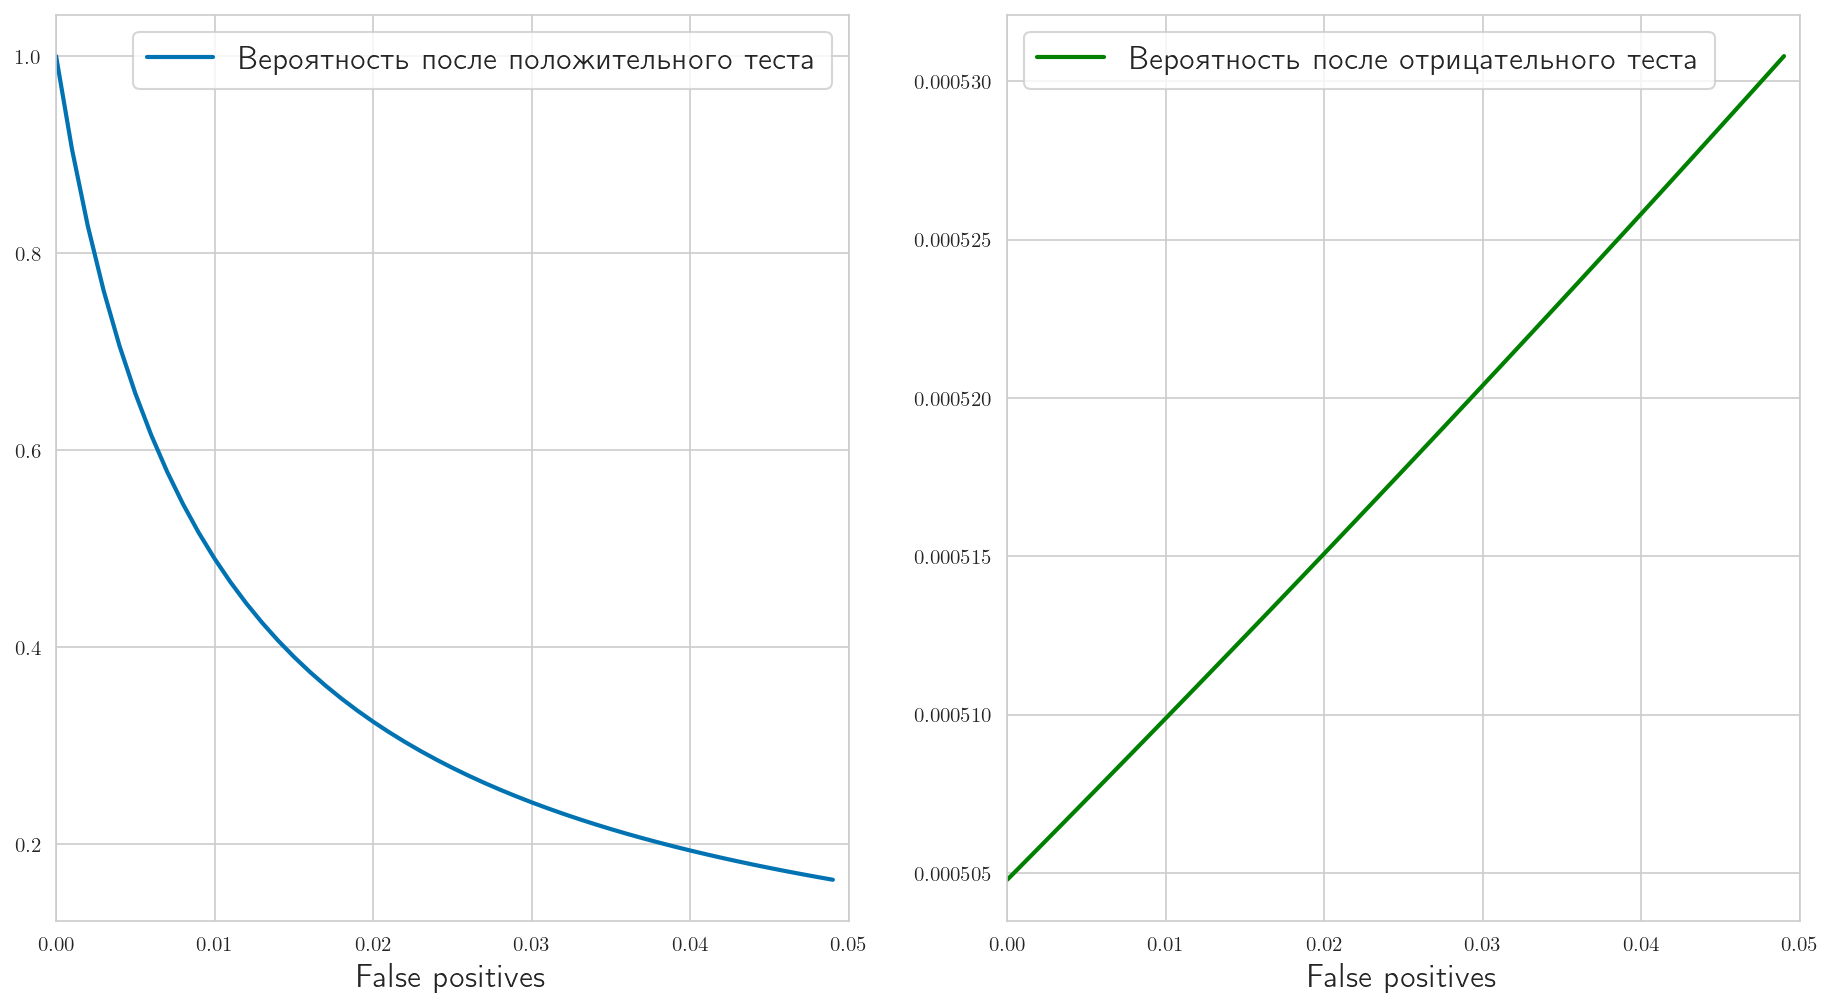

In [2]:
## если data == 1, тест положительный
def compute_posterior(data, false_positive, false_negative, prior_prob=0.01):
    if data == 1:
        return (1 - false_negative) * prior_prob / ((1 - false_negative) * prior_prob + false_positive * (1 - prior_prob))
    elif data == 0:
        return (false_negative * prior_prob / (false_negative * prior_prob + (1 - false_positive) * (1 - prior_prob)))
    else:
        return None

vector_posterior = np.vectorize(compute_posterior, excluded=['data'])
xs = np.arange(0, 0.05, 0.001)
#зафиксируем false_negative=0.05
ys_one=vector_posterior(1, false_positive=xs, false_negative=0.05*np.ones(len(xs)))
ys_zero = vector_posterior(0, false_positive=xs,false_negative=0.05*np.ones(len(xs)))

fig = plt.figure(figsize=figsize)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xs, ys_one, linewidth=2, label='Вероятность после положительного теста')
ax1.set_xlim((0.0, 0.05))
ax1.set_xlabel('False positives', fontsize=legend_fontsize)
ax1.legend(fontsize=legend_fontsize)

ax2.plot(xs, ys_zero, linewidth=2, color='g', label='Вероятность после отрицательного теста')
ax2.set_xlabel('False positives', fontsize=legend_fontsize)
ax2.set_xlim((0.0, 0.05))
ax2.legend(fontsize=legend_fontsize)
plt.show()

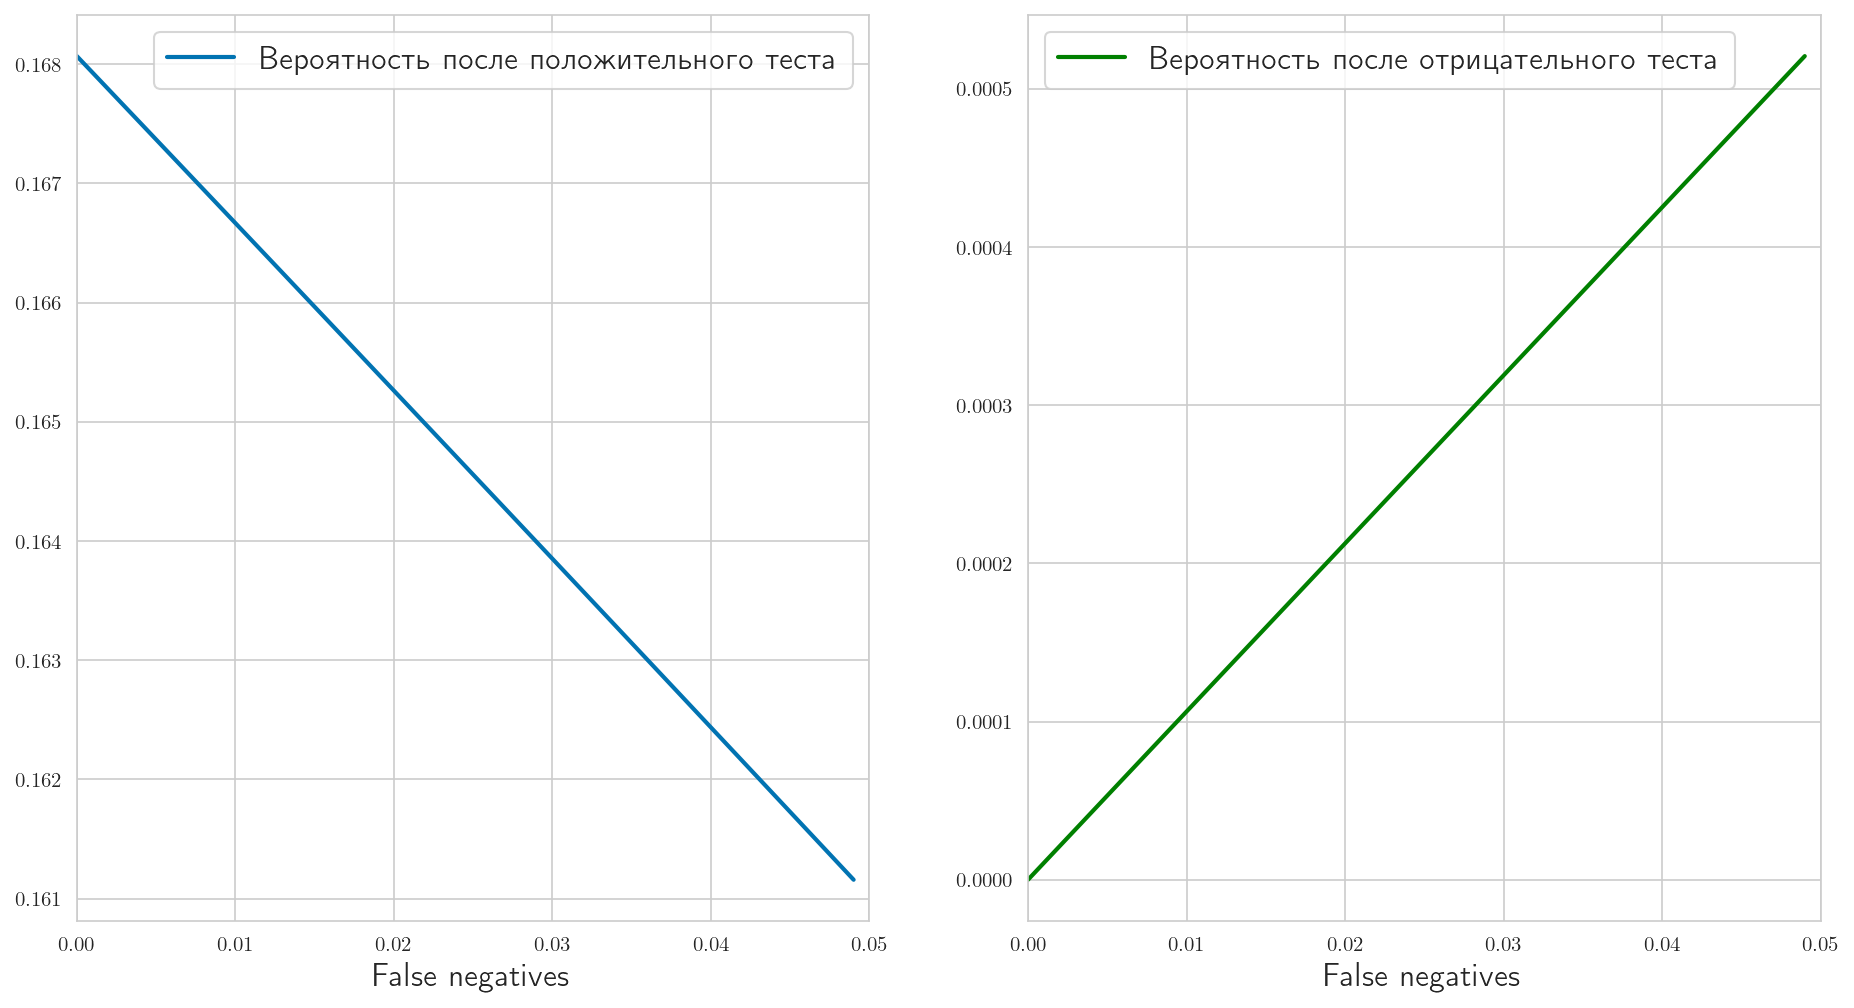

In [3]:
vector_posterior = np.vectorize(compute_posterior, excluded=['data'])
xs = np.arange(0, 0.05, 0.001)
#зафиксируем false_positive=0.05
ys_one=vector_posterior(1, false_positive=0.05*np.ones(len(xs)), false_negative=xs)
ys_zero = vector_posterior(0, false_positive=0.05*np.ones(len(xs)),false_negative=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(xs, ys_one, linewidth=2, label='Вероятность после положительного теста')
ax.set_xlim((0.0, 0.05))
ax.set_xlabel('False negatives', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)

ax2.plot(xs, ys_zero, linewidth=2, color='g', label='Вероятность после отрицательного теста')
ax2.set_xlabel('False negatives', fontsize=legend_fontsize)
ax2.set_xlim((0.0, 0.05))
ax2.legend(fontsize=legend_fontsize)
plt.show()

Видно, что снижение значения false positives при фиксированном значении false negatives сильно повышает апостериорную вероятность болезни при условии положительного теста, тогда как изменение false negatives при фиксированном значении false positives влияет не так существенно (вероятность меняется на тысячные доли, а в первом случае на десятые). Вероятность же оказаться больным при условии отрицательного теста низка в обоих случаях. Я бы предложила сконцентрироваться на уменьшении доли false positives для такого теста.

Часть 2.

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data

$1.$ Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые  стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [4]:
data = pd.read_csv('owid-covid-data.csv')

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
data_russia = data[(data['location'] == 'Russia')&(data['date']>='2020-03-03')].reset_index(drop=True)
data_russia.loc[data_russia['new_cases'] == 0,'new_cases'] = 1
data_russia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
1,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
4,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [7]:
data_train = data_russia[:50]
data_test = data_russia[50:]
total_cases = data_russia['total_cases']
new_cases = data_russia['new_cases']

$2.$ Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально.
Для первого подхода к снаряду давайте это и используем.


    a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x),где x — номер текущего дня.

    в. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся     для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически       первый шаг эмпирического Байеса).

    с. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев           коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно               эмпирически, исходя из данных сэмплирования).


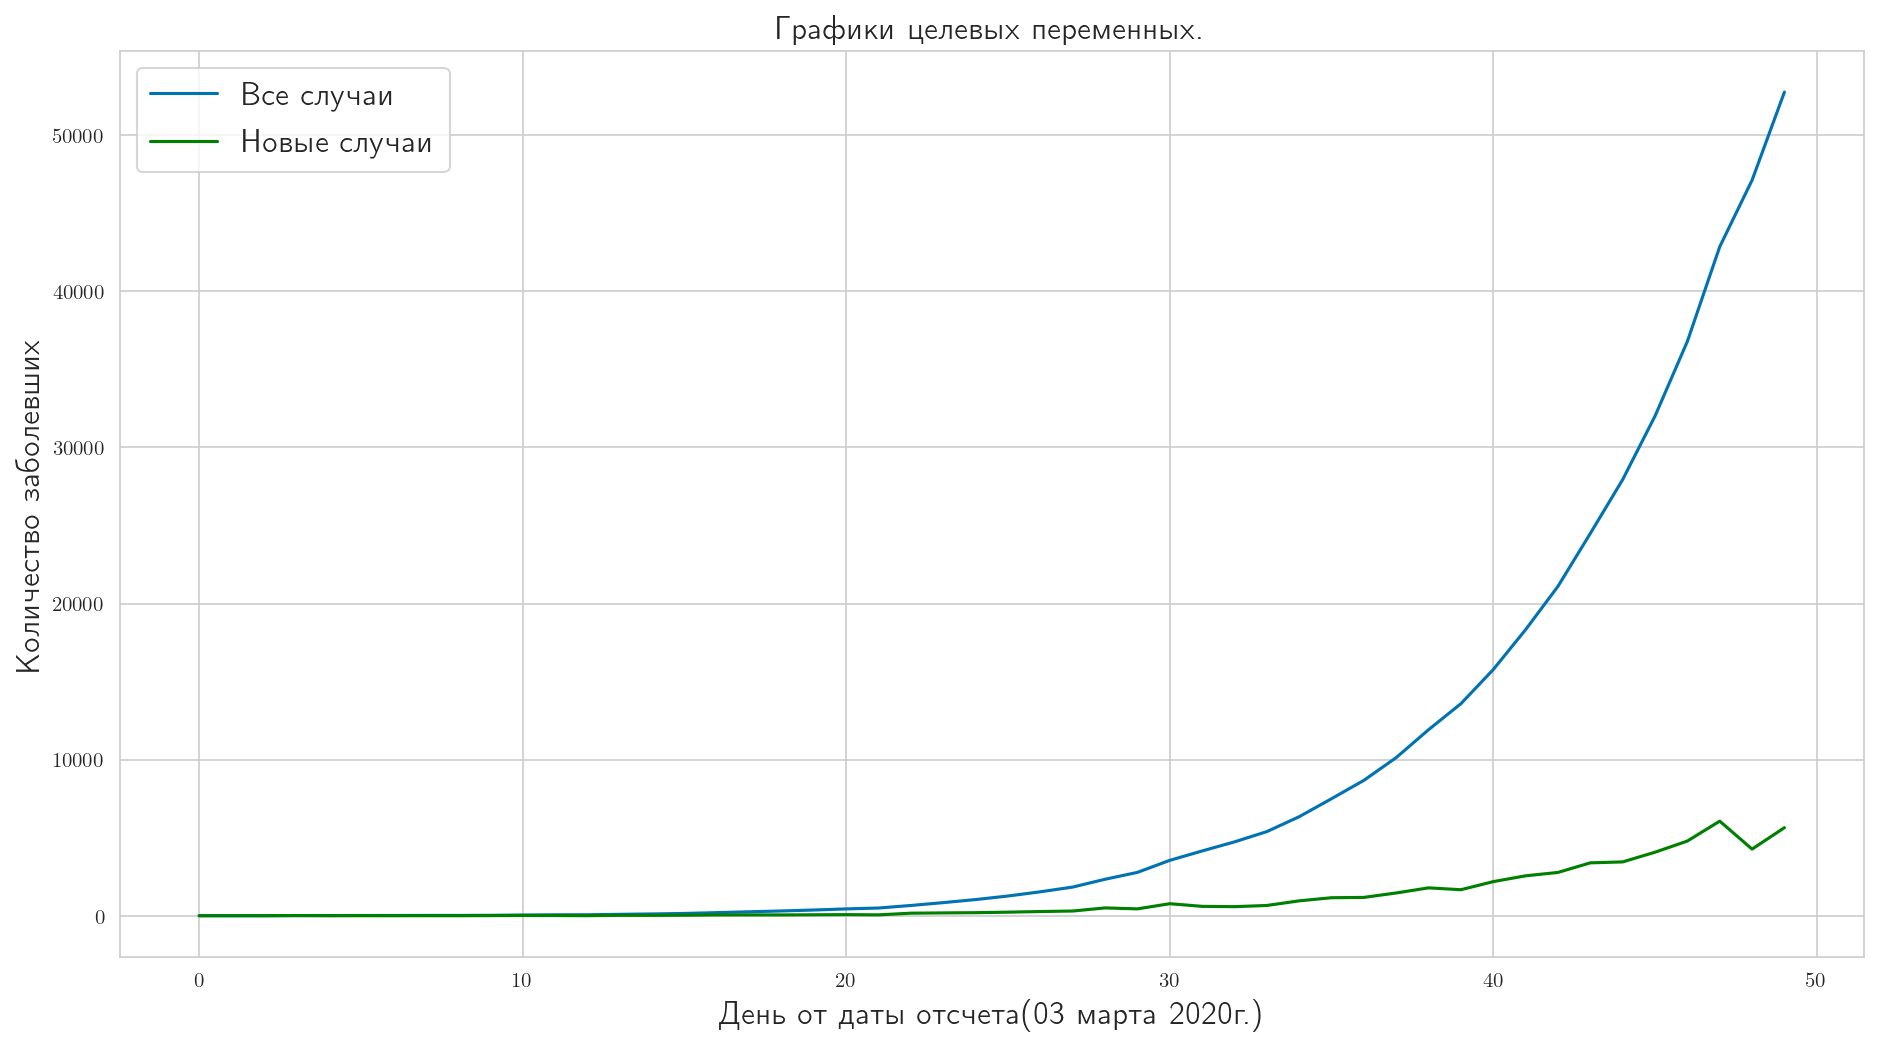

In [8]:
fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(111)
ax.plot(data_train['total_cases'],label="Все случаи")
plt.title('Графики целевых переменных.',fontsize=legend_fontsize)
ax.plot(data_train['new_cases'],color='g',label='Новые случаи')
ax.set_xlabel('День от даты отсчета(03 марта 2020г.)', fontsize=legend_fontsize)
ax.set_ylabel('Количество заболевших', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)

plt.show()

Text(0, 0.5, 'Количество заболевших')

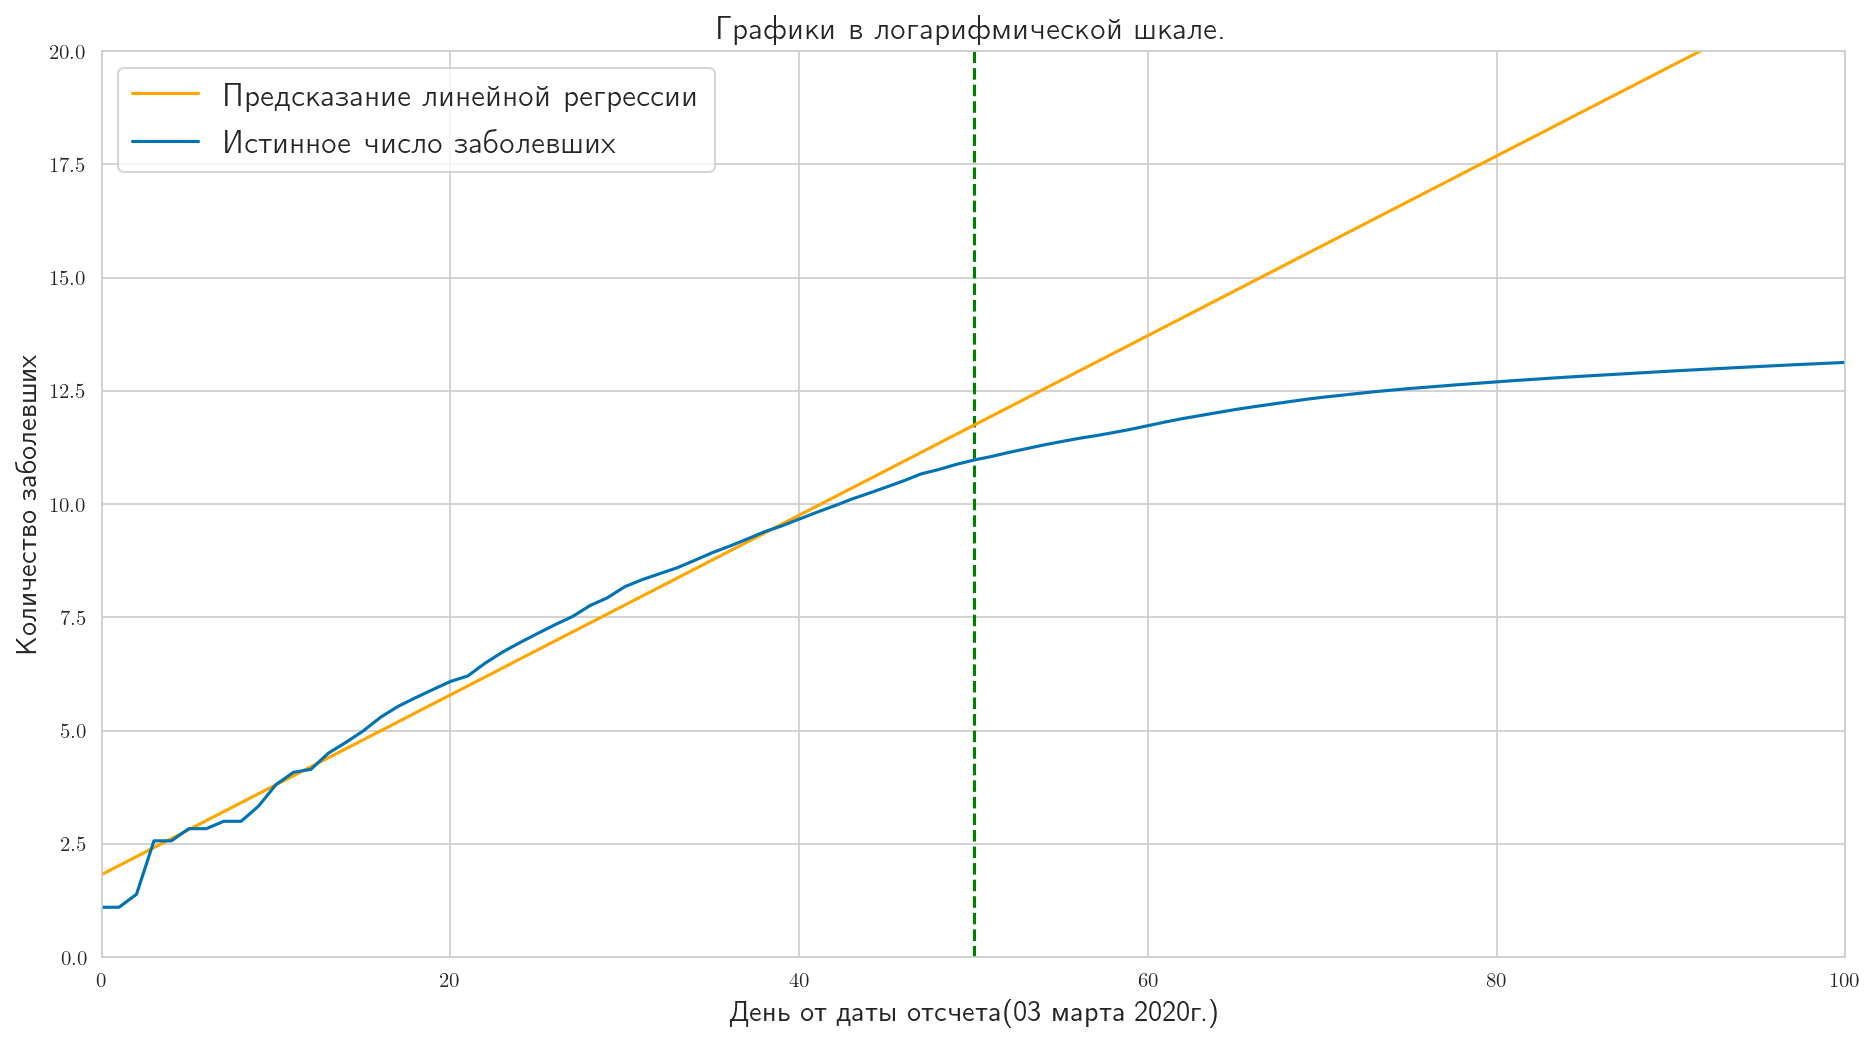

In [9]:
x_train = np.arange(1, len(data_train)+1).reshape(-1, 1)
x_all = np.arange(1, len(data_russia)+1).reshape(-1, 1)
model_lin_regr = linear_model.LinearRegression(fit_intercept=True).fit( x_train, np.log(total_cases[:50]))

fig, ax = plt.subplots(figsize=figsize)

plt.plot(model_lin_regr.predict(x_all),color='orange',label="Предсказание линейной регрессии")
ax.plot(np.log(total_cases),label='Истинное число заболевших')
ax.vlines(len(data_train), 0, 20, linestyle="dashed",color='g')
ax.set_xlim((0, 100))
ax.set_ylim((0, 20))
ax.legend(fontsize=legend_fontsize)
plt.title('Графики в логарифмической шкале.',fontsize=legend_fontsize)
ax.set_xlabel('День от даты отсчета(03 марта 2020г.)',fontsize=14)
ax.set_ylabel('Количество заболевших',fontsize=14)

In [10]:
sigma_noise = np.std(model_lin_regr.predict(x_train) - np.log(total_cases[:50]))
print(f'{sigma_noise:.3f}')

0.349


In [11]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = x.reshape(1, -1)
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

def get_poly_features(d, x):
    return np.array([ x ** i for i in range(d + 1)])

def train_model(d, xs, ys, sigma_noise=0.35):
    mu_0 = np.zeros(d + 1)
    sigma_0 = 100 * np.eye(d + 1)
    mu, sigma = mu_0, sigma_0
    for x,y in zip(xs, ys):
        mu, sigma = bayesian_update(mu, sigma, get_poly_features(d, x), y, sigma_noise=sigma_noise)
    return mu, sigma

In [12]:
mu, sigma = train_model(1, x_train, np.log(total_cases[:50]))

Text(0.5, 1.0, 'Графики в логарифмической шкале.')

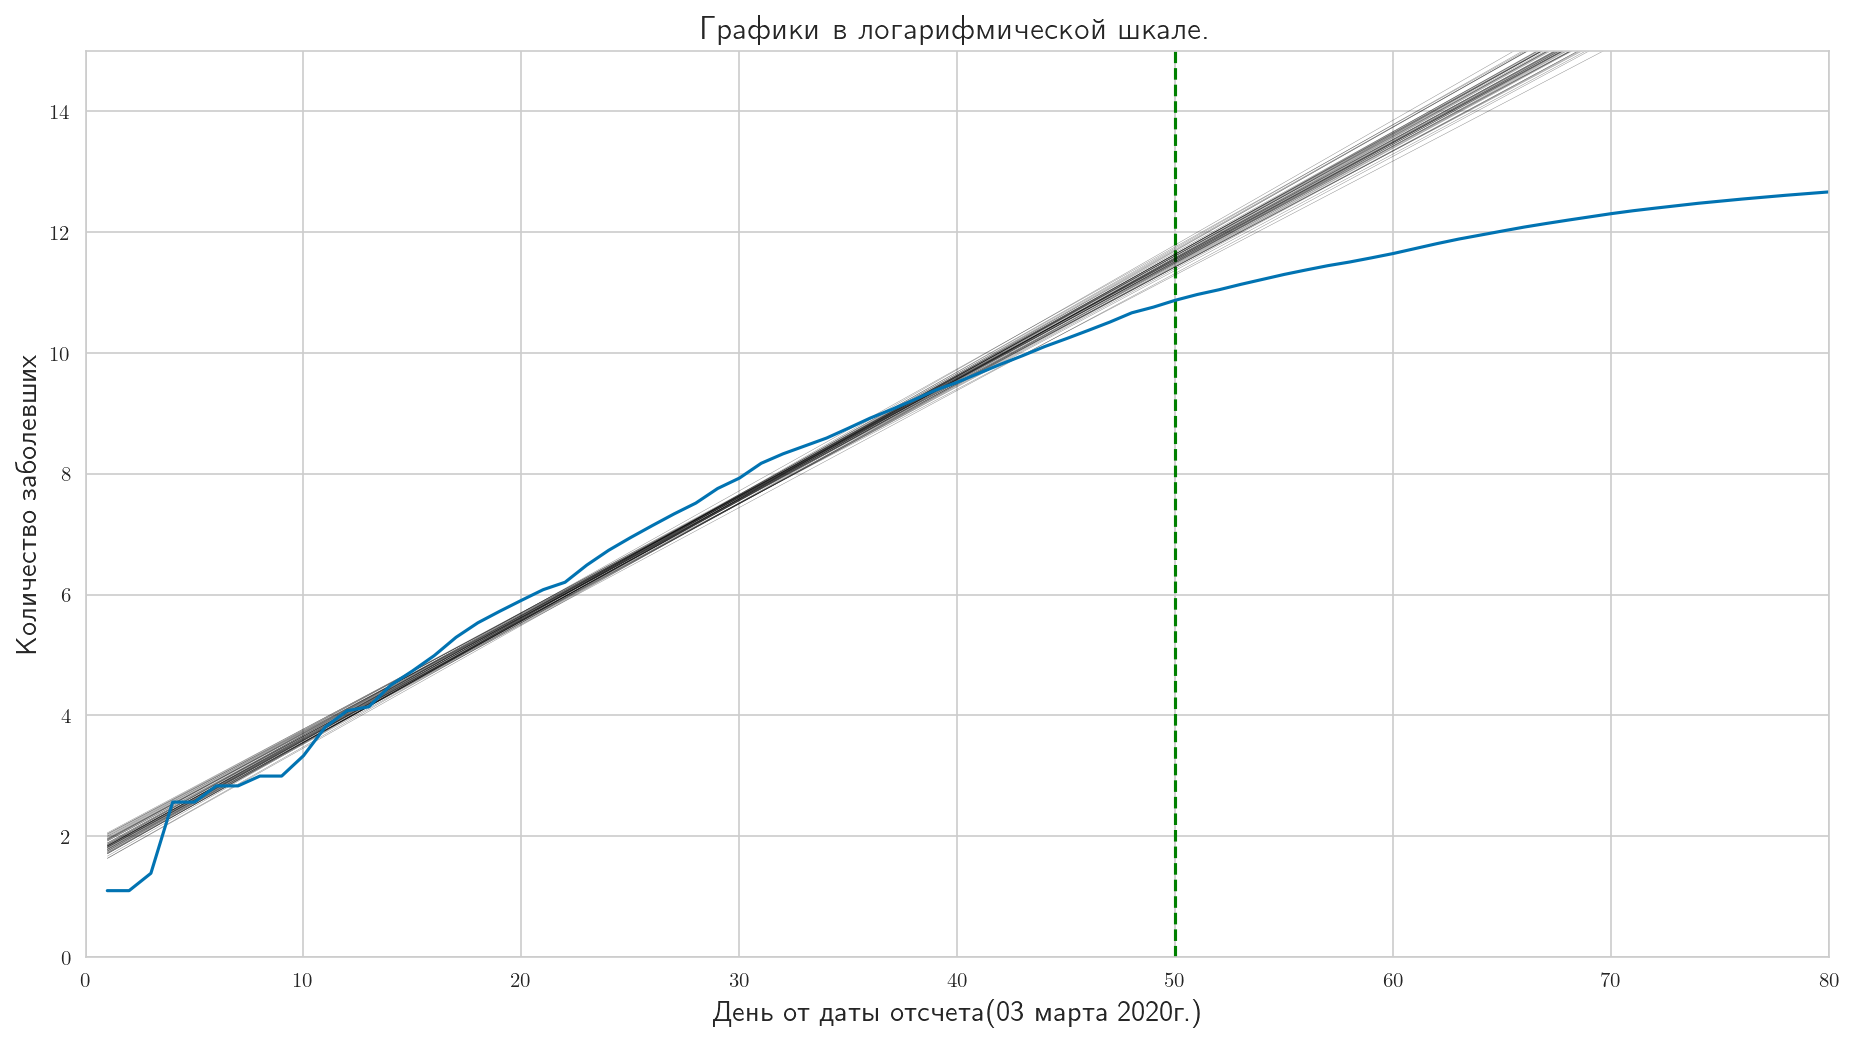

In [13]:
xs=np.arange(1, len(x_all) + 1)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
sample_w = np.random.multivariate_normal(mu, sigma, 50)
for w in sample_w:
    ax.plot(xs, np.dot(w, get_poly_features(1, xs)), 'k-', lw=.2, alpha=.5)

ax.plot(xs, np.log(total_cases) )
ax.vlines(len(data_train), 0, 15, linestyle="dashed",color='g')
ax.set_ylim((0, 15))
ax.set_xlim((0, 80))
ax.set_xlabel('День от даты отсчета(03 марта 2020г.)',fontsize=14)
ax.set_ylabel('Количество заболевших',fontsize=14)
plt.title('Графики в логарифмической шкале.',fontsize=legend_fontsize)

Text(0.5, 1.0, 'Графики в линейной шкале.')

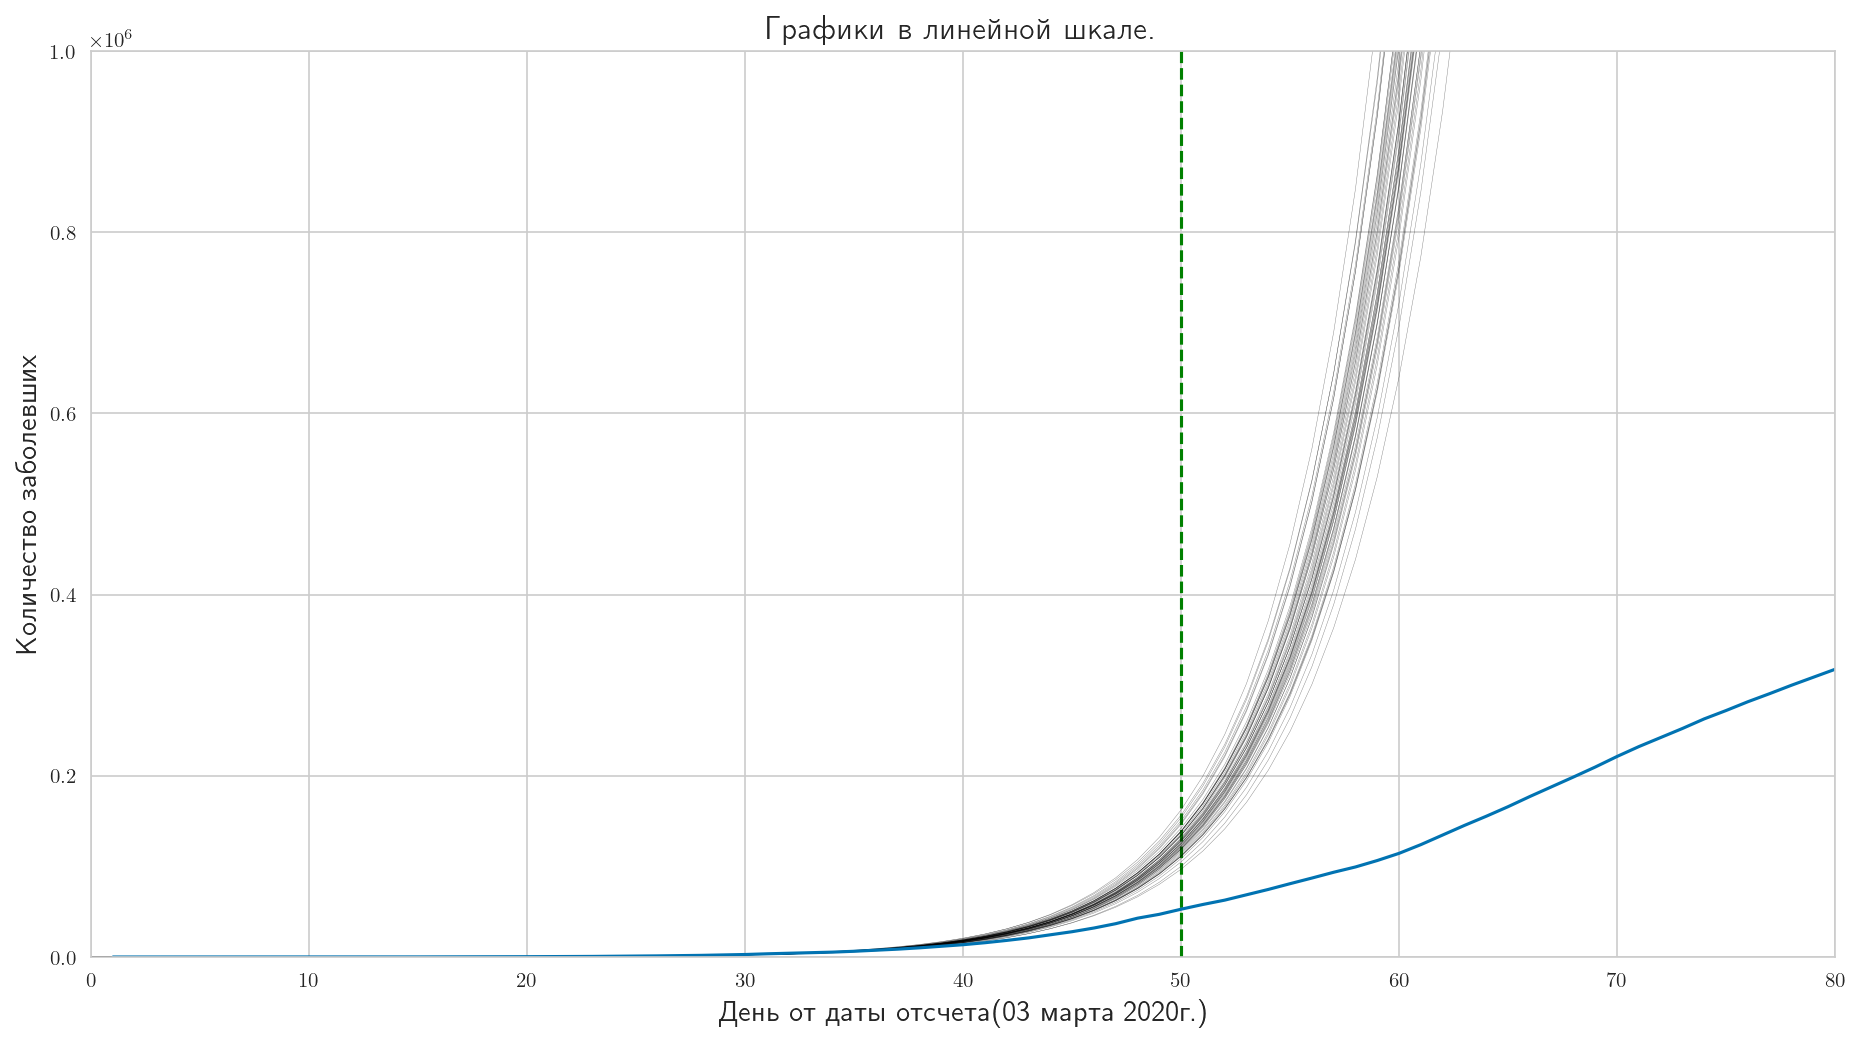

In [14]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

for w in sample_w:
    ax.plot(np.exp(np.dot(w, get_poly_features(1, xs))), 'k-', lw=.2, alpha=.5)
    
ax.plot(xs, total_cases)
ax.set_ylim(0,1000000)
ax.set_xlim(0,80)
ax.vlines(len(data_train), 0, 1000000, linestyle="dashed",color='g')
ax.set_xlabel('День от даты отсчета(03 марта 2020г.)',fontsize=14)
ax.set_ylabel('Количество заболевших',fontsize=14)
plt.title('Графики в линейной шкале.',fontsize=legend_fontsize)

In [15]:
from datetime import datetime
start = datetime.strptime('2020-03-03', '%Y-%m-%d')
may = datetime.strptime('2020-05-01', '%Y-%m-%d')
june = datetime.strptime('2020-06-01', '%Y-%m-%d')
sept = datetime.strptime('2020-09-01', '%Y-%m-%d')
by_may = (may - start).days
by_june = (june - start).days
by_sept = (sept - start).days

print(f'Число заболевших к 1 мая: {np.exp(model_lin_regr.predict(x_all))[by_may] / 1_000_000:.3f} млн')
print(f'Число заболевших к 1 июня: {np.exp(model_lin_regr.predict(x_all))[by_june] / 1_000_000:.3f} млн')
print(f'Число заболевших к 1 сентября: {np.exp(model_lin_regr.predict(x_all))[by_sept] / 1_000_000:.3f} млн')


Число заболевших к 1 мая: 0.744 млн
Число заболевших к 1 июня: 347.724 млн
Число заболевших к 1 сентября: 29104907396.230 млн


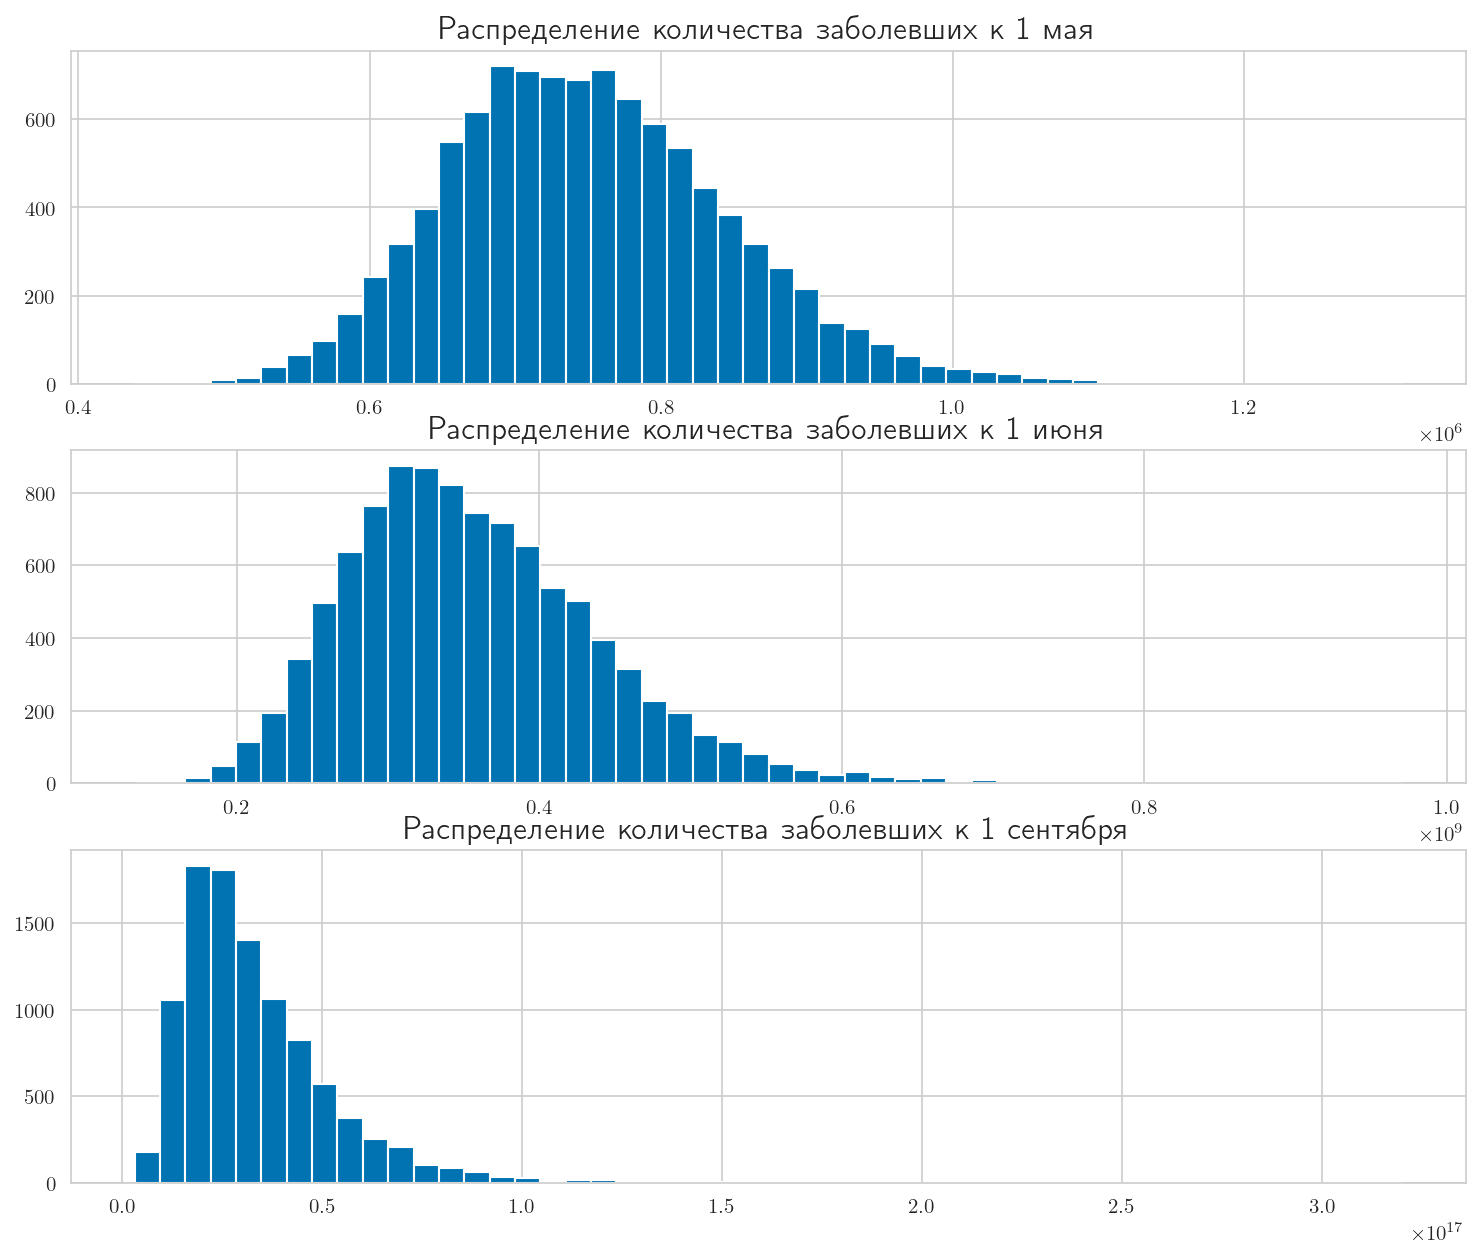

In [16]:
sample_w = np.random.multivariate_normal(mu, sigma, 10000)
xs_all=np.arange(1, len(x_all) + 1)

samples =  np.exp(np.dot(get_poly_features(1, xs_all).T,sample_w.T)) 

fig, ax = plt.subplots(3,figsize=(12,10))

ax[0].hist(samples[by_may], bins=50)
ax[0].set_title('Распределение количества заболевших к 1 мая')

ax[1].hist(samples[by_june], bins=50)
ax[1].set_title('Распределение количества заболевших к 1 июня')

ax[2].hist(samples[by_sept], bins=50)
ax[2].set_title('Распределение количества заболевших к 1 сентября')

plt.show()

$3.$ Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана.Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

    a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

    b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой      модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

    c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


Продифференцируем функцию распределения гауссиана и прологарифмируем. Получится $\ln ( dy )=w_2\cdot x^2+w_1\cdot x+w_0$. Будем моделировать линейной регрессией с полиномиальными признаками степени 2.

In [17]:
mu, sigma = train_model(2, x_train, np.log(new_cases[:50]))
sample_w = np.random.multivariate_normal(mu, sigma, 50)

Text(0.5, 1.0, 'Графики в логарифмической шкале.')

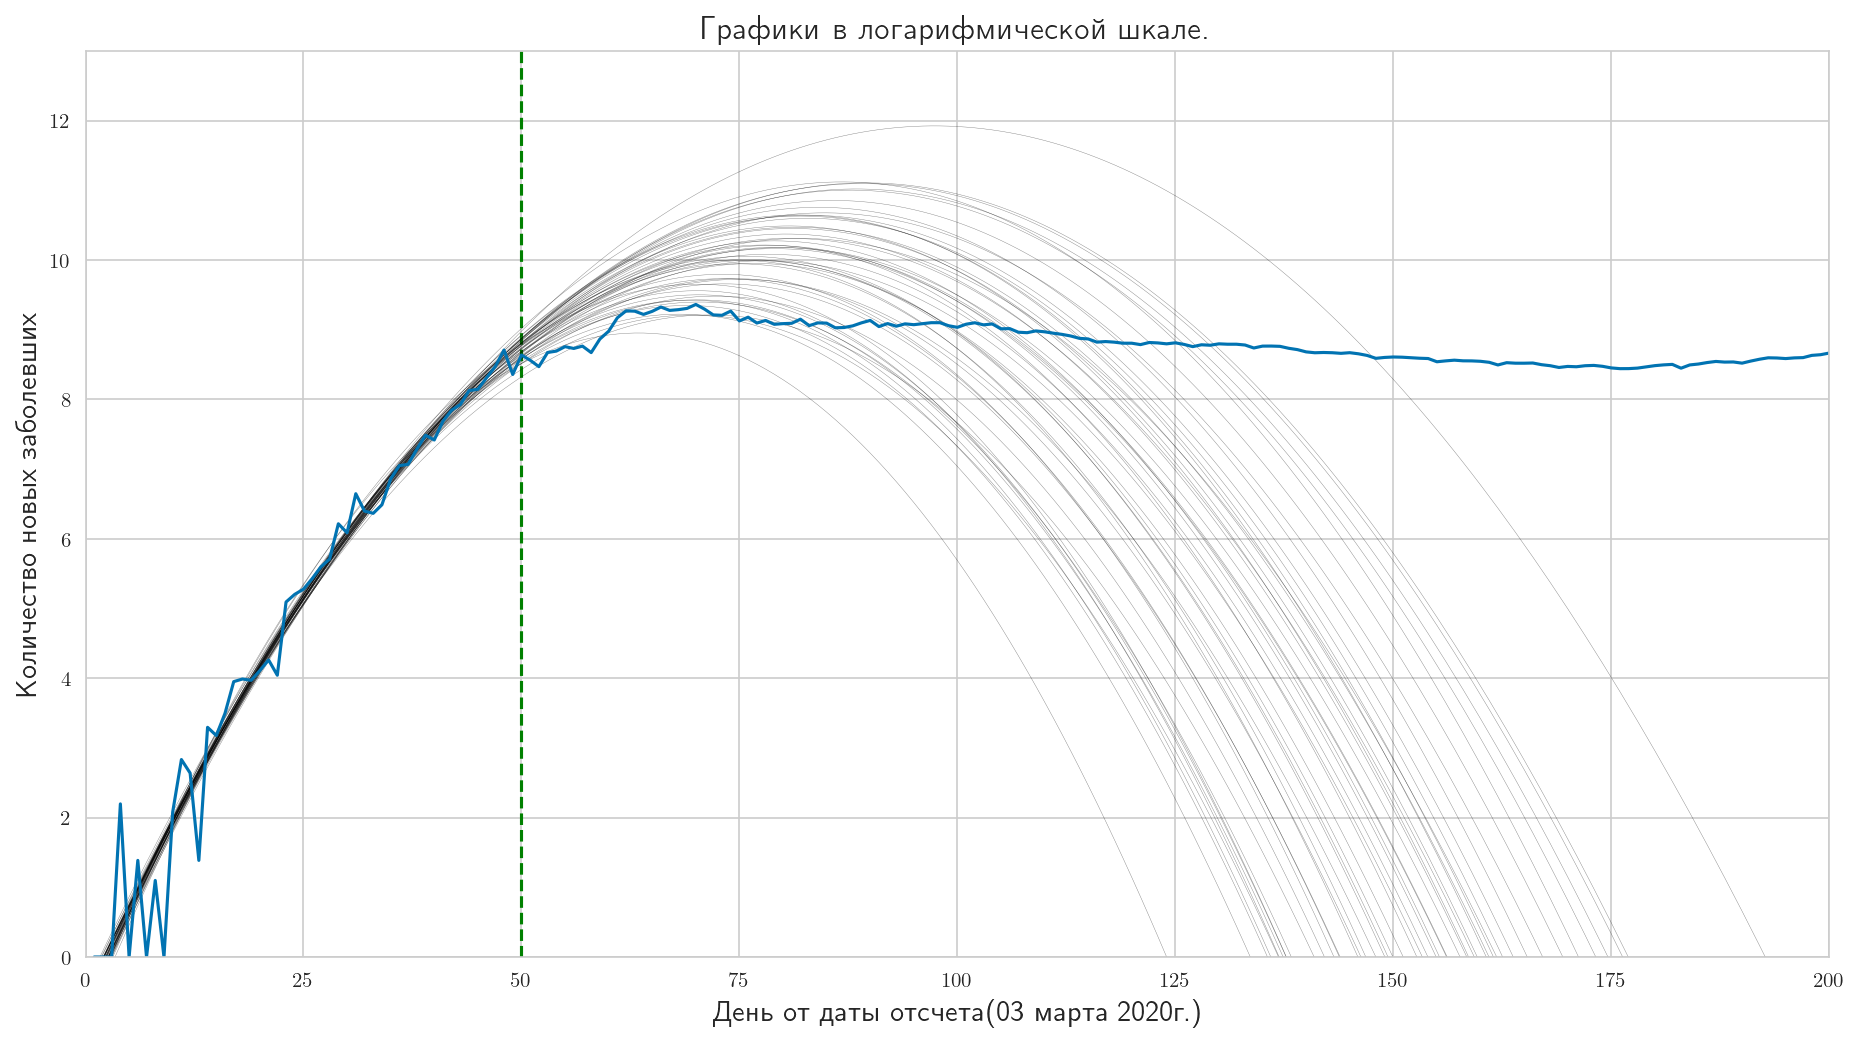

In [18]:
xs_all=np.arange(1, len(x_all) + 1)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

for w in sample_w:
    ax.plot(xs, np.dot(w, get_poly_features(2, xs_all)), 'k-', lw=.2, alpha=.5)

ax.plot(xs_all, np.log(new_cases))
ax.vlines(len(data_train), 0, 13, linestyle="dashed",color='g')
ax.set_ylim((0, 13))
ax.set_xlim((0, 200))
ax.set_xlabel('День от даты отсчета(03 марта 2020г.)',fontsize=14)
ax.set_ylabel('Количество новых заболевших',fontsize=14)
plt.title('Графики в логарифмической шкале.',fontsize=legend_fontsize)

Text(0.5, 1.0, 'Графики в линейной шкале.')

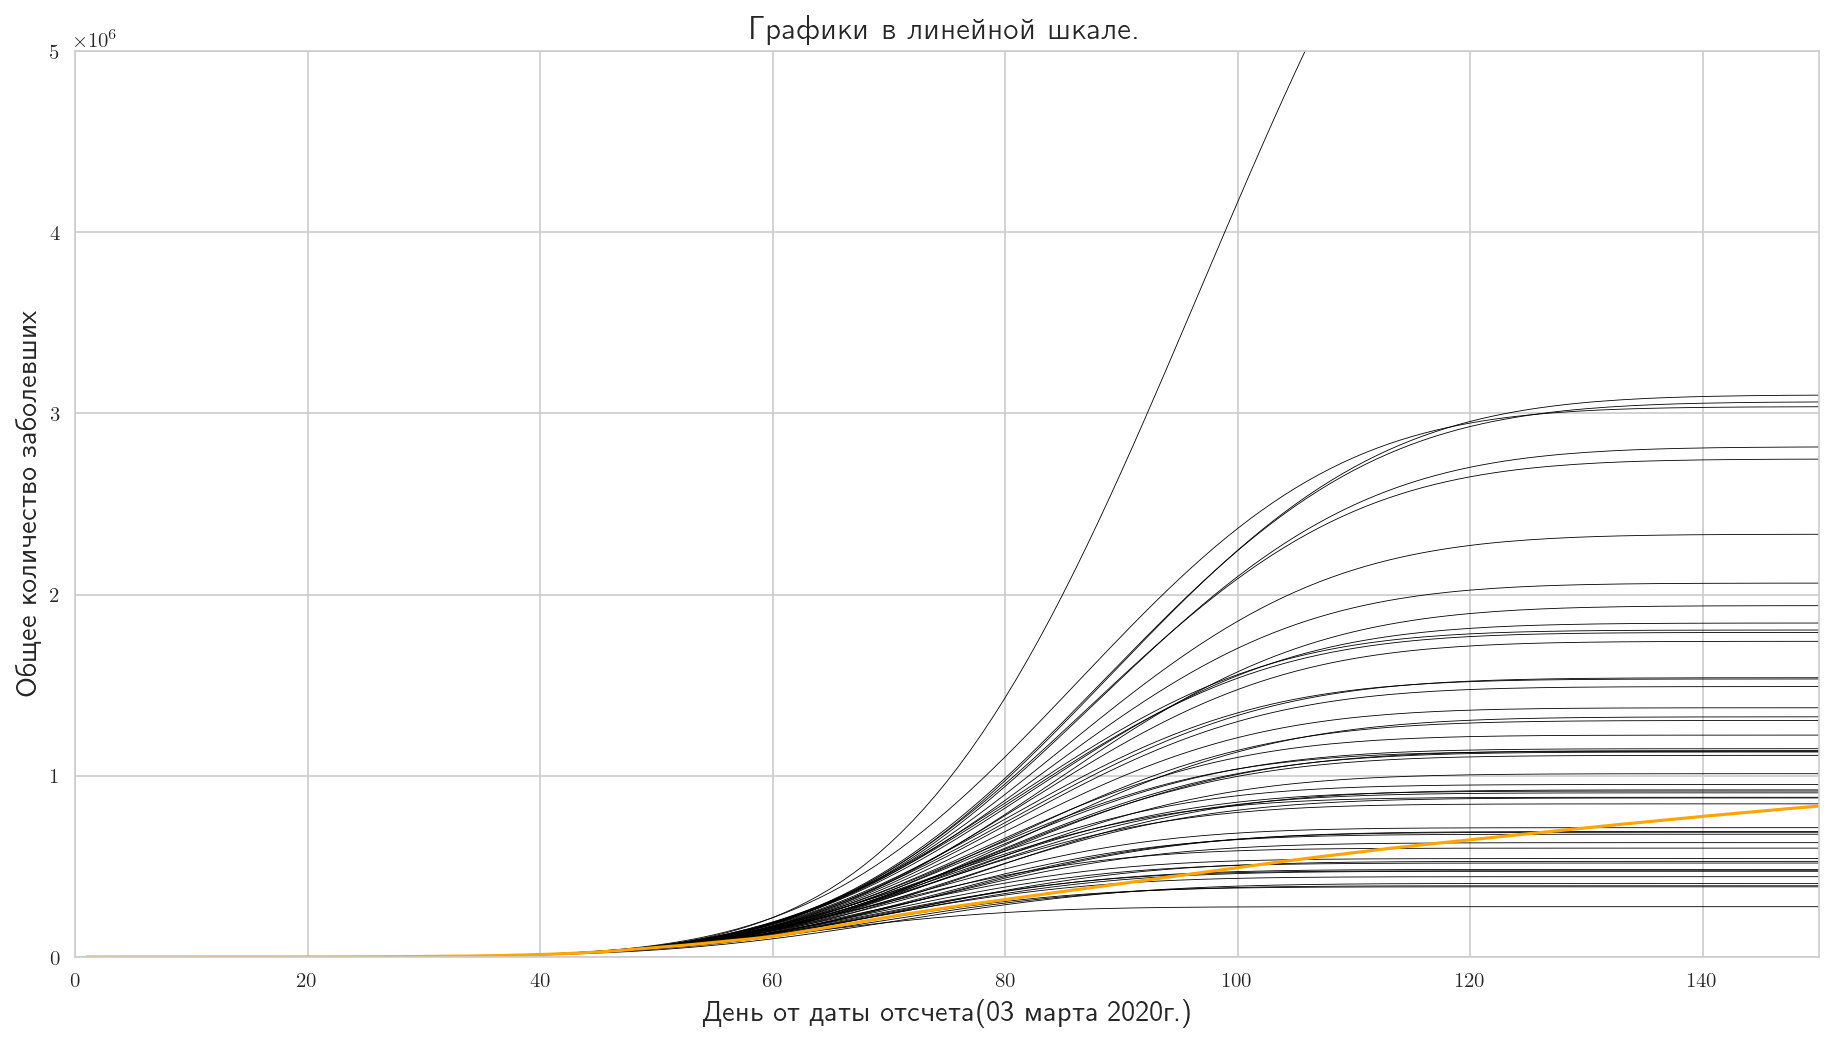

In [19]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
preds = np.array([np.cumsum(np.exp(np.dot(w, get_poly_features(2, xs_all)))) for w in sample_w ])

for i, w in enumerate(sample_w):
    ax.plot(xs_all, preds[i], 'k-', lw=.4)

ax.plot(xs_all, total_cases,color='orange')
ax.set_ylim((0, 5000000))
ax.set_xlim((0, 150))
ax.set_xlabel('День от даты отсчета(03 марта 2020г.)',fontsize=14)
ax.set_ylabel('Общее количество заболевших',fontsize=14)
plt.title('Графики в линейной шкале.',fontsize=legend_fontsize)

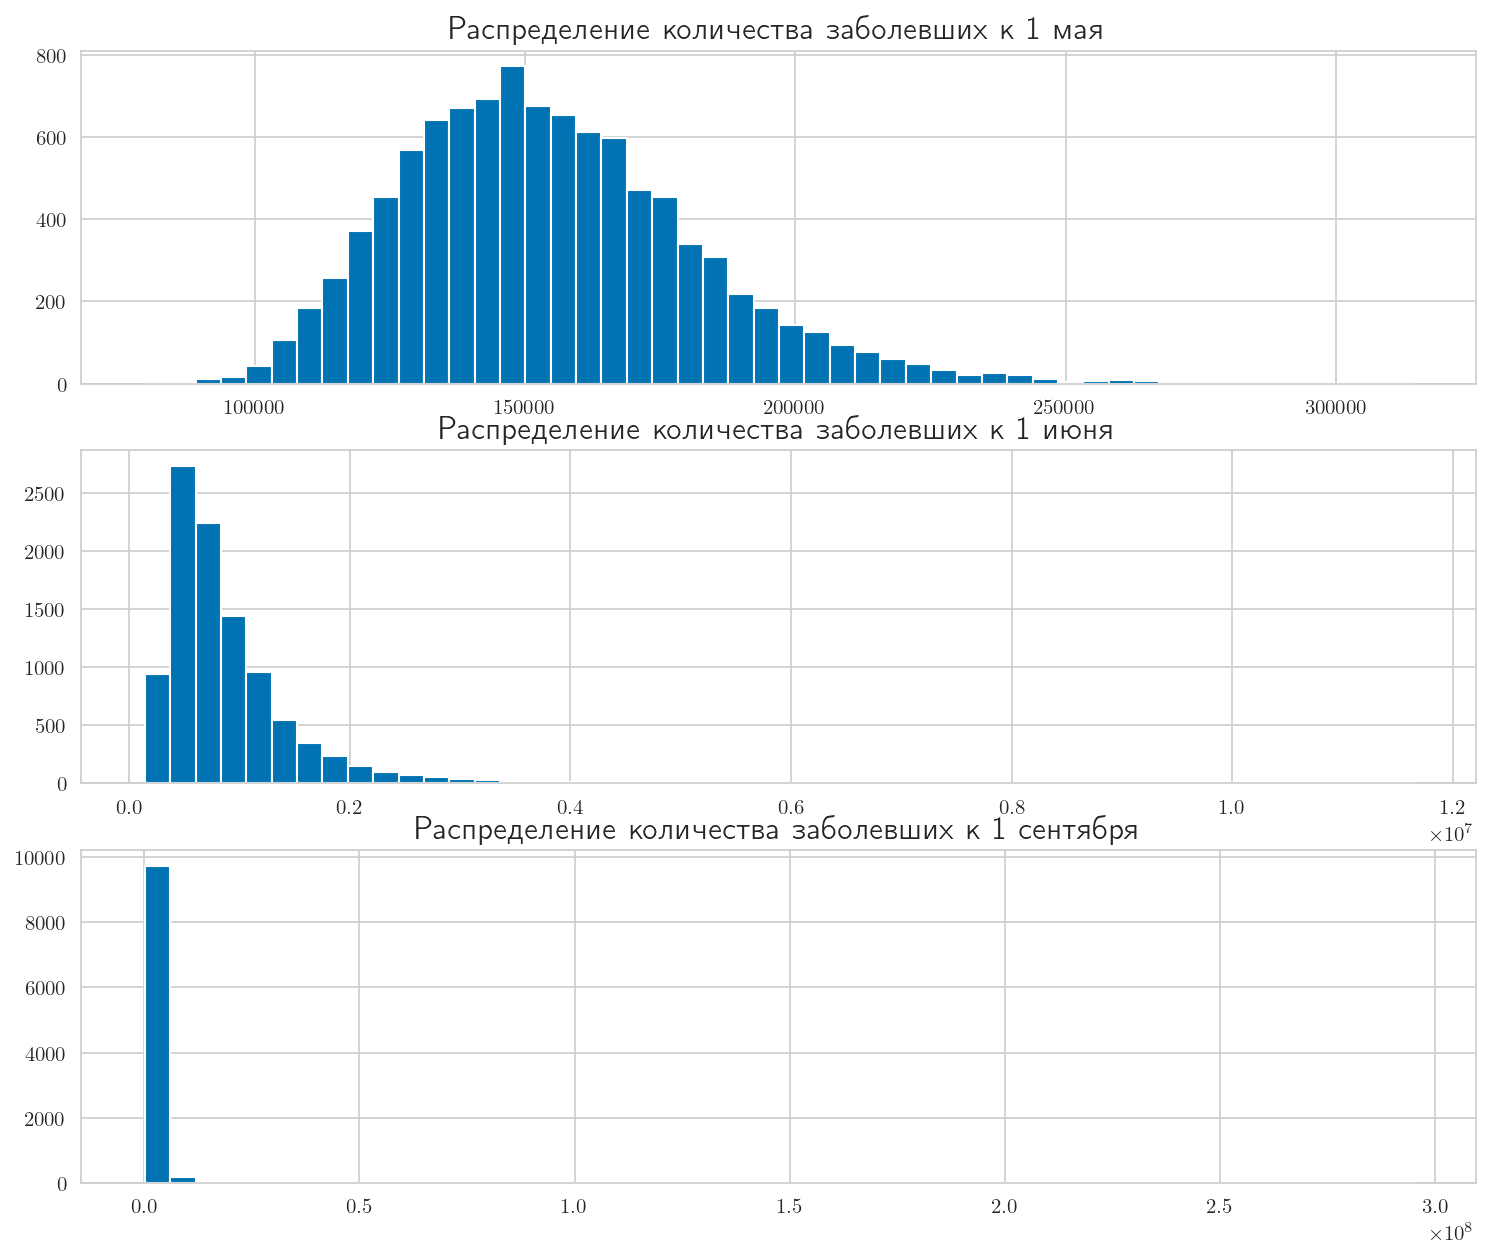

In [20]:
sample_w = np.random.multivariate_normal(mu, sigma, 10000)
preds = np.array([np.cumsum(np.exp(np.dot(w, get_poly_features(2, xs_all))) ) for w in sample_w])

fig, ax = plt.subplots(3,figsize=(12,10))

ax[0].hist(preds[:,by_may], bins=50)
ax[0].set_title('Распределение количества заболевших к 1 мая')

ax[1].hist(preds[:,by_june], bins=50)
ax[1].set_title('Распределение количества заболевших к 1 июня')

ax[2].hist(preds[:,by_sept], bins=50)
ax[2].set_title('Распределение количества заболевших к 1 сентября')

plt.show()


Text(0.5, 0.98, 'Сравнение предсказания с реальными значениями')

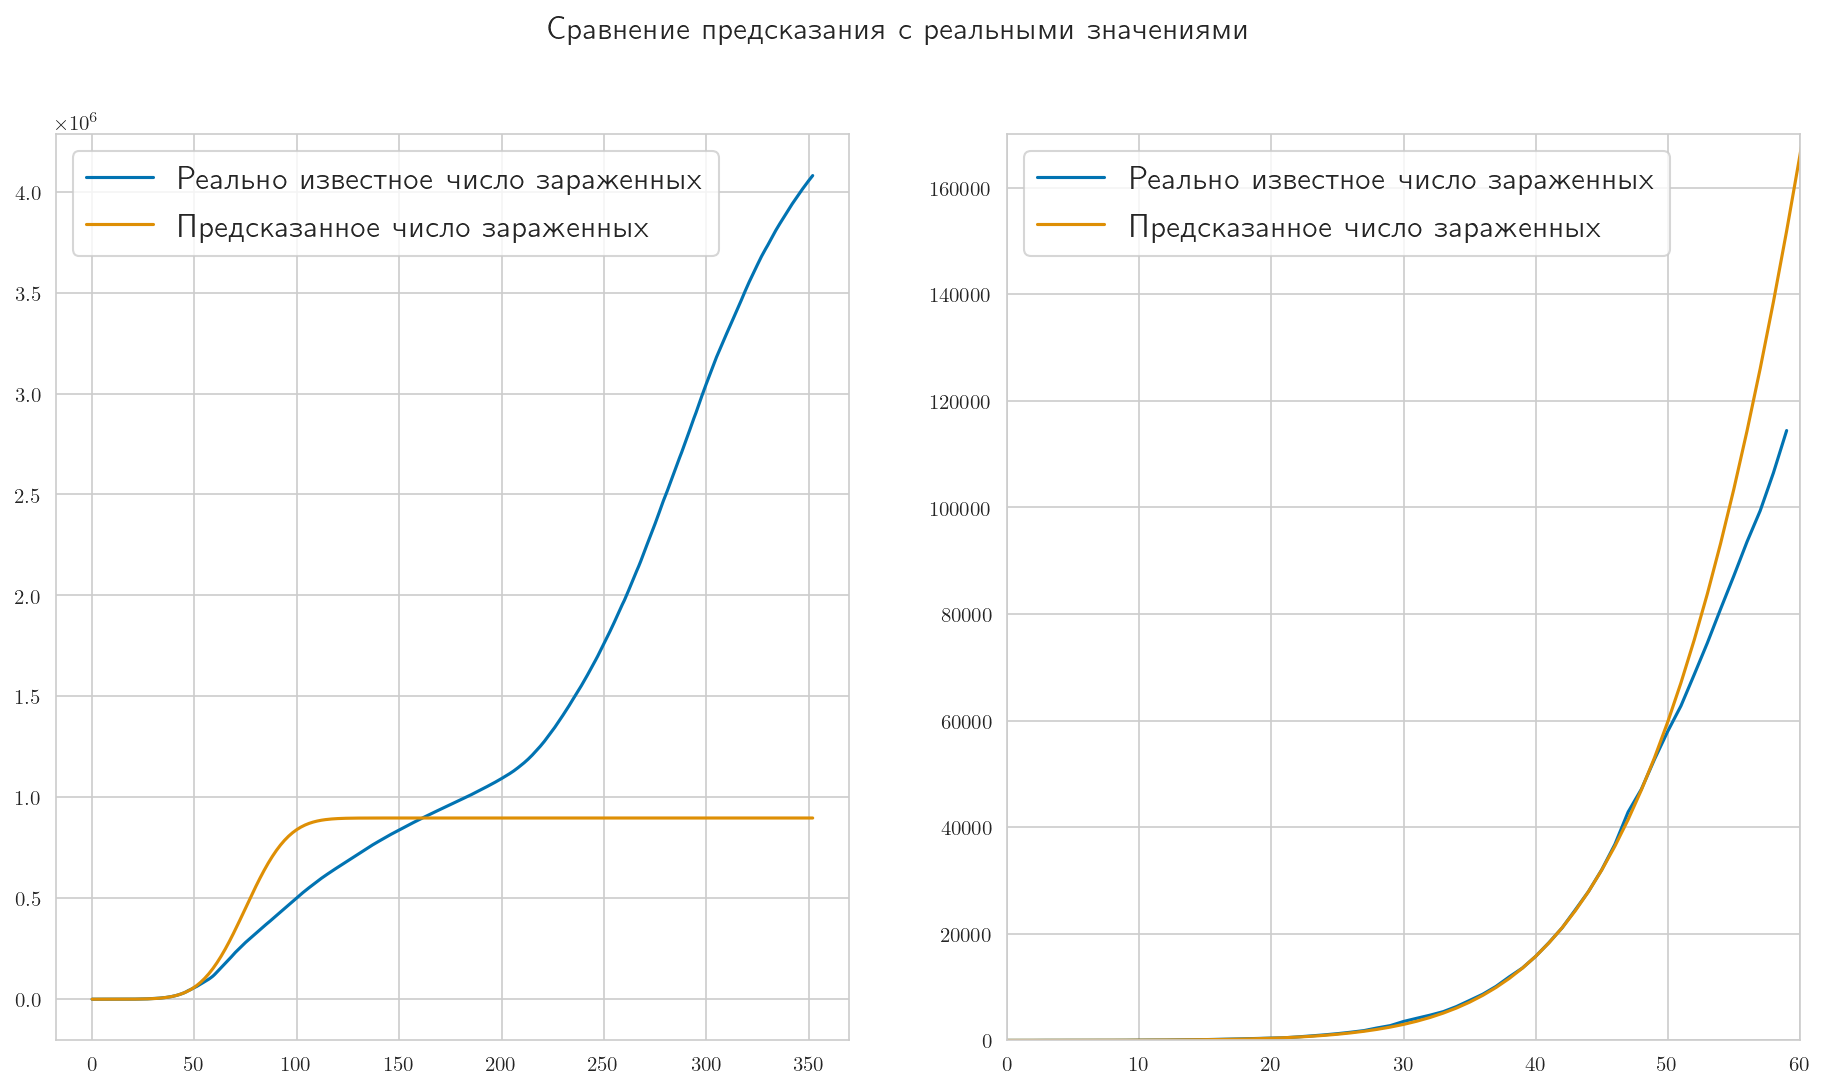

In [21]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(total_cases, label='Реально известное число зараженных')
ax.plot(np.cumsum(np.exp(np.dot(get_poly_features(2, xs_all).T,mu))),label='Предсказанное число зараженных')
ax.legend(fontsize=legend_fontsize)
ax2.plot(total_cases[:60], label='Реально известное число зараженных')
ax2.plot(np.cumsum(np.exp(np.dot(get_poly_features(2, xs_all).T,mu))),label='Предсказанное число зараженных')
ax2.set_xlim(0,60)
ax2.set_ylim(0,170000)
ax2.legend(fontsize=legend_fontsize)
fig.suptitle('Сравнение предсказания с реальными значениями',fontsize=legend_fontsize)

In [22]:
print(f'Число заболевших при пессимистичном сценарии к 1 мая: { np.percentile(preds[:,by_may], 90)/ 1_000_000:.3f} млн человек.')
print(f'Число заболевших при оптимистичном сценарии к 1 мая: { np.percentile(preds[:,by_may], 10)/ 1_000_000:.3f} млн человек.')
print(f'Реальное число заболевших к 1 мая: {total_cases[by_may]/ 1_000_000:.3f} млн человек\n')

print(f'Число заболевших при пессимистичном сценарии к 1 июня: { np.percentile(preds[:,by_june], 90)/ 1_000_000:.3f} млн человек.')
print(f'Число заболевших при оптимистичном сценарии к 1 июня: { np.percentile(preds[:,by_june], 10)/ 1_000_000:.3f} млн человек.')
print(f'Реальное число заболевших к 1 июня: {total_cases[by_june]/ 1_000_000:.3f} млн человек\n')

print(f'Число заболевших при пессимистичном сценарии к 1 сентября: { np.percentile(preds[:,by_sept], 90)/ 1_000_000:.3f} млн человек.')
print(f'Число заболевших при оптимистичном сценарии к 1 сентября: { np.percentile(preds[:,by_sept], 10)/ 1_000_000:.3f} млн человек.')
print(f'Реальное число заболевших к 1 сентября: {total_cases[by_sept]/ 1_000_000:.3f} млн человек.\n')

Число заболевших при пессимистичном сценарии к 1 мая: 0.190 млн человек.
Число заболевших при оптимистичном сценарии к 1 мая: 0.122 млн человек.
Реальное число заболевших к 1 мая: 0.114 млн человек

Число заболевших при пессимистичном сценарии к 1 июня: 1.599 млн человек.
Число заболевших при оптимистичном сценарии к 1 июня: 0.380 млн человек.
Реальное число заболевших к 1 июня: 0.414 млн человек

Число заболевших при пессимистичном сценарии к 1 сентября: 2.737 млн человек.
Число заболевших при оптимистичном сценарии к 1 сентября: 0.406 млн человек.
Реальное число заболевших к 1 сентября: 0.997 млн человек.



$5.$ Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?


Моделирование с помощью экспоненты не подходит для коронавируса, рост слишком быстрый. Сигмоида подходит чуть больше, но прогноз близок 
к действительности лишь на коротком интервале времени. Принять решение о вводе карантина по таким предсказаниям сложно, слишком сильный разброс предсказаний. Возможно, при обучении на большем количестве данных и/или добавлении новых признаков результаты моделирования будут точнее.